In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

Taking the data input using the pd.read_csv()

In [2]:
house_data = pd.read_csv(r'\Users\gaura\Desktop\House_prediction.csv')
sample=house_data.head(100)
house_data.shape

(10692, 13)

Checking the Database

In [3]:
house_data.head()
#sample database

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Plotting the availability of rooms in house  city wise.

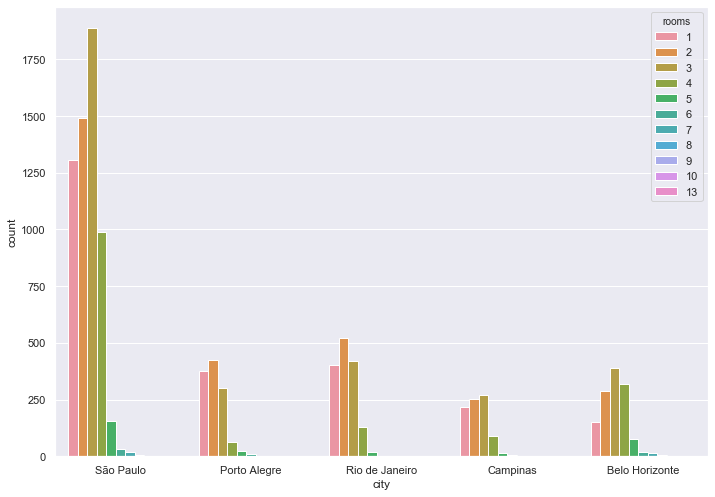

In [4]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x="city",data=house_data,hue = 'rooms')


Plotting the animals are allowed or not in houses citywise

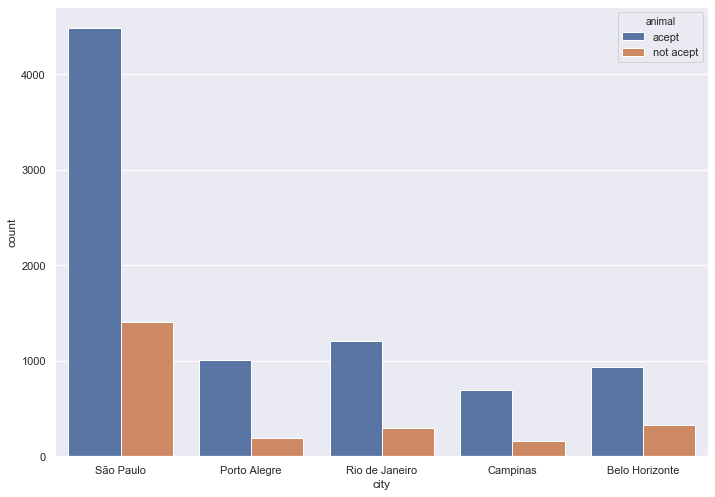

In [5]:
sns.countplot(x="city",data=house_data,hue = 'animal')

Plotting the no of furnished/unfurnished houses citywise

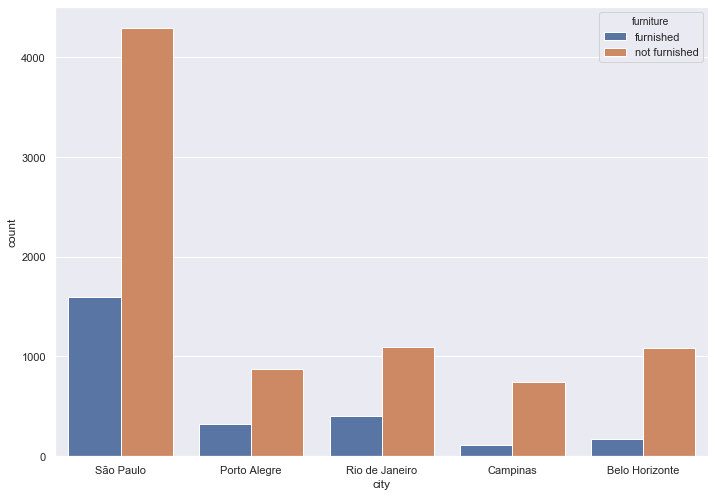

In [6]:
sns.countplot(x="city",data=house_data,hue = 'furniture')

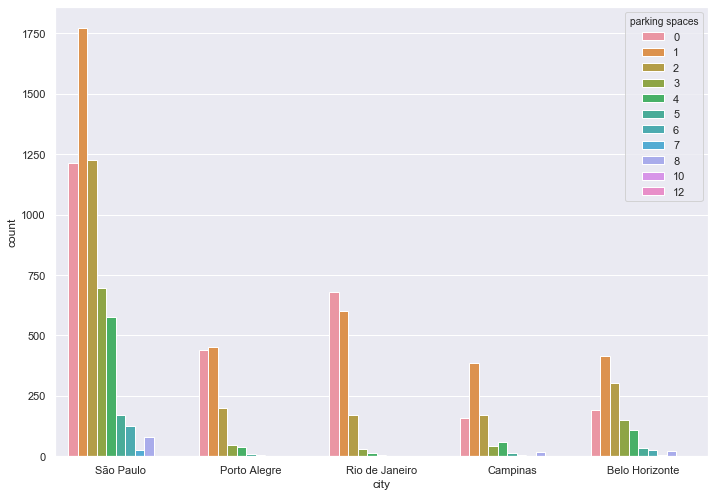

In [7]:
#Plotting the no of parking spaces per house houses citywise
sns.countplot(x="city",data=house_data,hue = 'parking spaces')

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

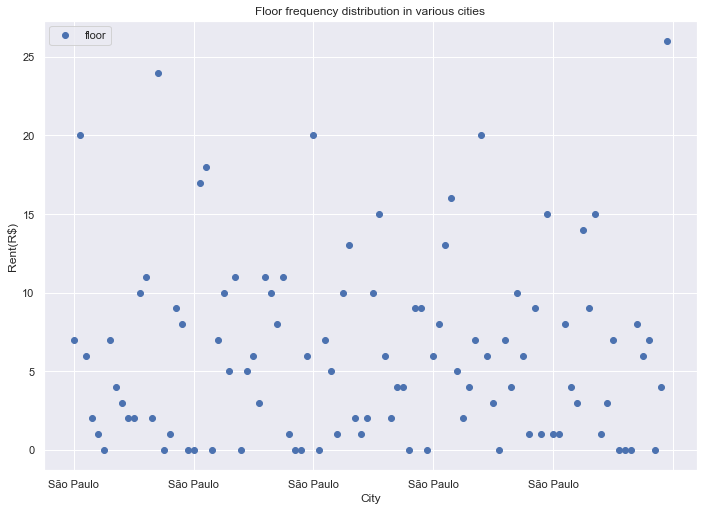

In [8]:
#replace'_' with 0 and typecast it to int
sample.floor[sample.floor=='-']=0
sample['floor'] = pd.to_numeric(sample["floor"])
#plotting
sample.plot(x='city', y="floor", style='o')  
plt.title('Floor frequency distribution in various cities')  
plt.xlabel('City')  
plt.ylabel('Rent(R$)')  
plt.show()


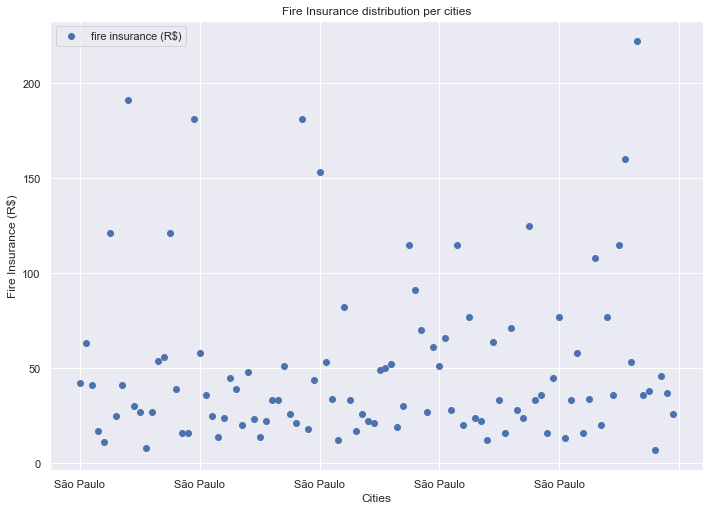

In [9]:
sample.plot(x='city', y='fire insurance (R$)',style="o") 
plt.title("Fire Insurance distribution per cities")
plt.xlabel("Cities")
plt.ylabel("Fire Insurance (R$)")
plt.show()

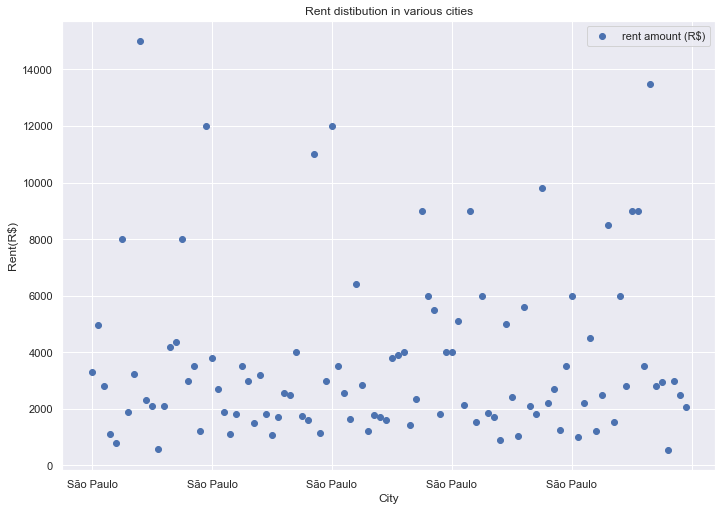

In [10]:
sample.plot(x='city', y="rent amount (R$)", style='o')  
plt.title('Rent distibution in various cities')  
plt.xlabel('City')  
plt.ylabel('Rent(R$)')  
plt.show()

Text(0, 0.5, 'Property Taxes (R$)')

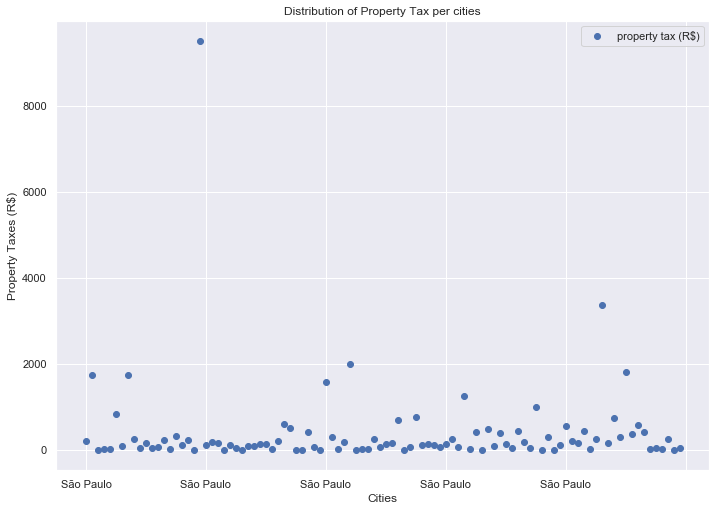

In [11]:
sample.plot(x='city', y='property tax (R$)',style="o")  
plt.title("Distribution of Property Tax per cities")
plt.xlabel("Cities")
plt.ylabel("Property Taxes (R$)")


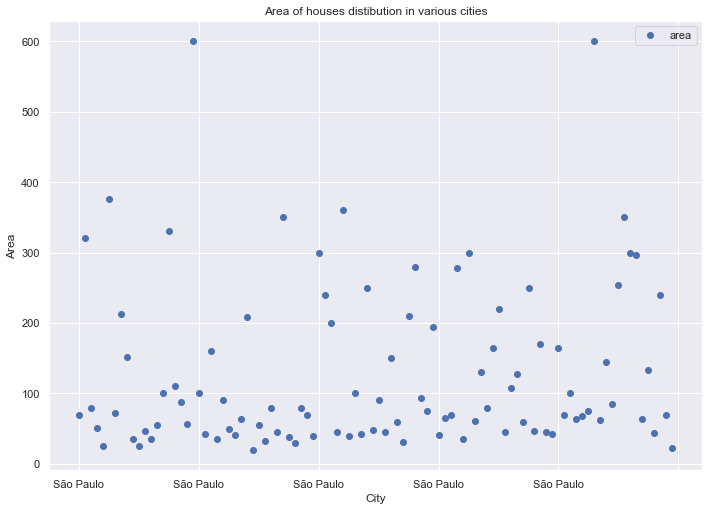

In [12]:
sample.plot(x='city', y="area", style='o')  
plt.title('Area of houses distibution in various cities')  
plt.xlabel('City')  
plt.ylabel('Area')  
plt.show()

# PART 2

In [13]:
from scipy.stats import pearsonr

In [14]:
#Replacing the string values with integers

house_data.animal[house_data.animal == 'acept'] = 1
house_data.animal[house_data.animal == 'not acept'] = 0
house_data.floor[house_data.floor=='-']=0
house_data['floor'] = pd.to_numeric(house_data["floor"])
house_data.furniture[house_data.furniture=='furnished']=1
house_data.furniture[house_data.furniture=='not furnished']=0
house_data.head(n=5)

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [15]:
#Replacing the string values with integers

sample.animal[sample.animal == 'acept'] = 1
sample.animal[sample.animal == 'not acept'] = 0
sample.floor[sample.floor=='-']=0
sample['floor'] = pd.to_numeric(sample["floor"])
sample.furniture[sample.furniture=='furnished']=1
sample.furniture[sample.furniture=='not furnished']=0

C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\gaura\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

The Pearson correlation coefficient is used to summarize the strength of the linear relationship between two data samples.
The sign of the The Pearson correlation coefficient can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative).
The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

Finding corelation between hoa and other values

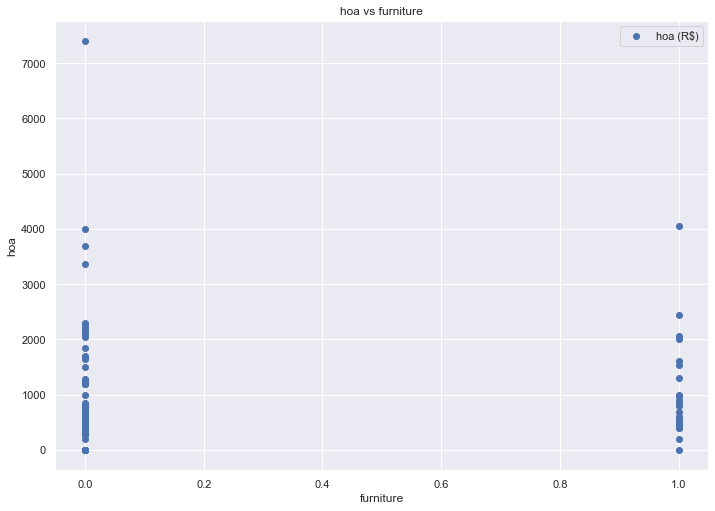

Pearsons correlation: 0.003


In [16]:
sample.plot(x='furniture', y="hoa (R$)", style='o')  
plt.title('hoa vs furniture')  
plt.xlabel('furniture')  
plt.ylabel('hoa')  
plt.show()

data1=house_data['hoa (R$)'].values
data2=house_data['furniture'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

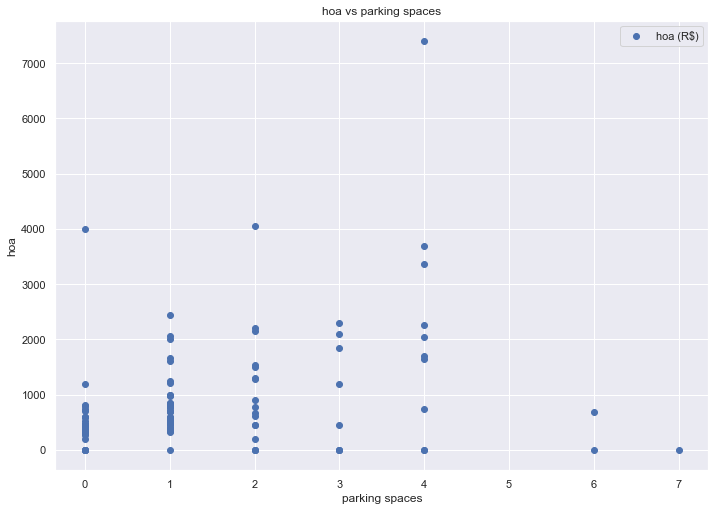

Pearsons correlation: 0.009


In [17]:
sample.plot(x='parking spaces', y="hoa (R$)", style='o')  
plt.title('hoa vs parking spaces')  
plt.xlabel('parking spaces')  
plt.ylabel('hoa')  
plt.show()

data1=house_data['hoa (R$)'].values
data2=house_data['parking spaces'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

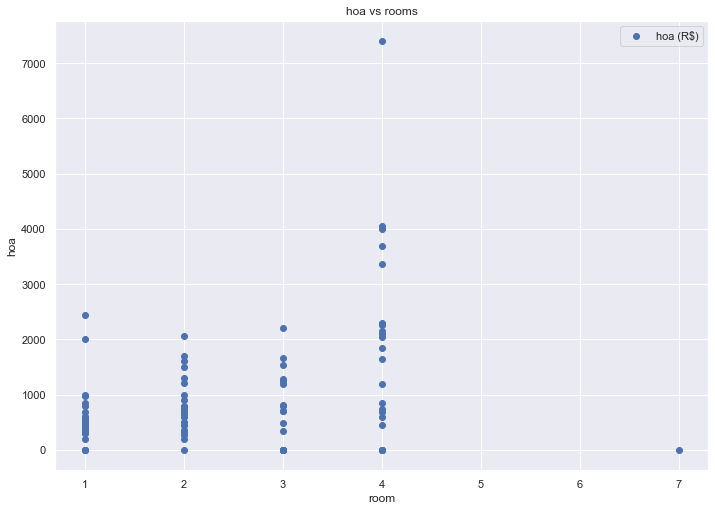

Pearsons correlation: 0.007


In [18]:
sample.plot(x='rooms', y="hoa (R$)", style='o')  
plt.title('hoa vs rooms')  
plt.xlabel('room')  
plt.ylabel('hoa')  
plt.show()

data1=house_data['hoa (R$)'].values
data2=house_data['rooms'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

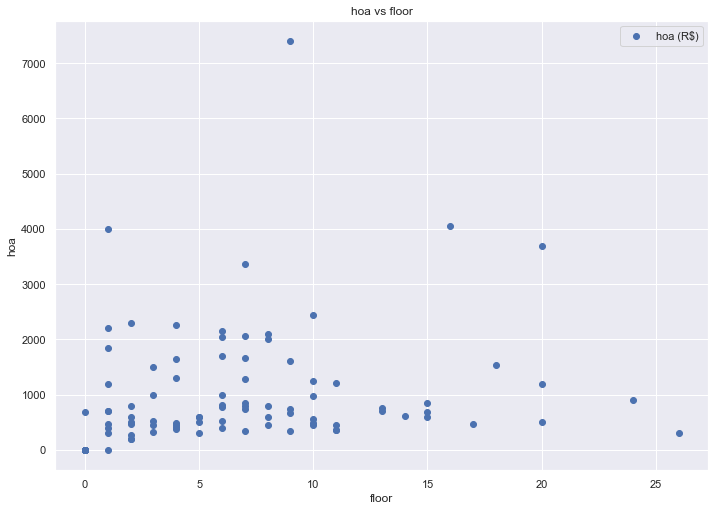

Pearsons correlation: 0.020


In [19]:
sample.plot(x='floor', y="hoa (R$)", style='o')  
plt.title('hoa vs floor')  
plt.xlabel('floor')  
plt.ylabel('hoa')  
plt.show()

data1=house_data['hoa (R$)'].values
data2=house_data['floor'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

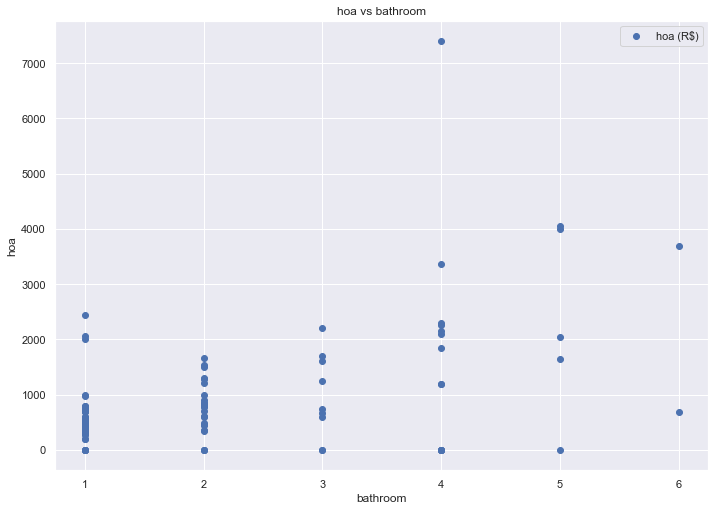

Pearsons correlation: 0.050


In [20]:
sample.plot(x='bathroom', y="hoa (R$)", style='o')  
plt.title('hoa vs bathroom')  
plt.xlabel('bathroom')  
plt.ylabel('hoa')  
plt.show()

data1=house_data['hoa (R$)'].values
data2=house_data['bathroom'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Finding corelation between property tax and other values

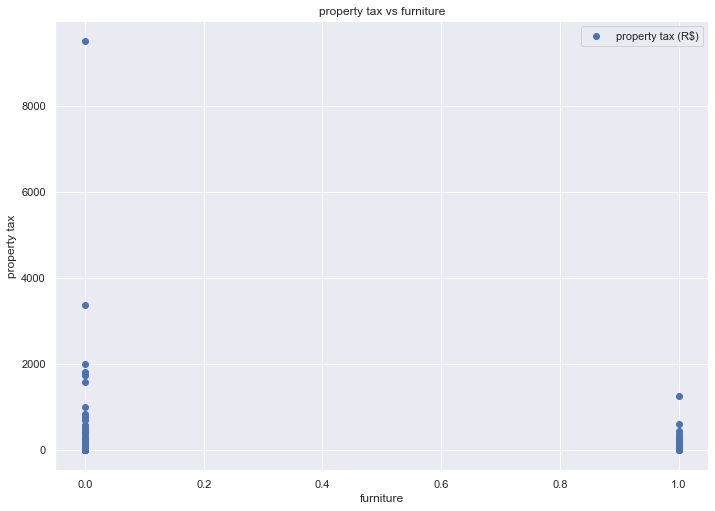

Pearsons correlation: 0.001


In [21]:
sample.plot(x='furniture', y="property tax (R$)", style='o')  
plt.title('property tax vs furniture')  
plt.xlabel('furniture')  
plt.ylabel('property tax')  
plt.show()

data1=house_data['property tax (R$)'].values
data2=house_data['furniture'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

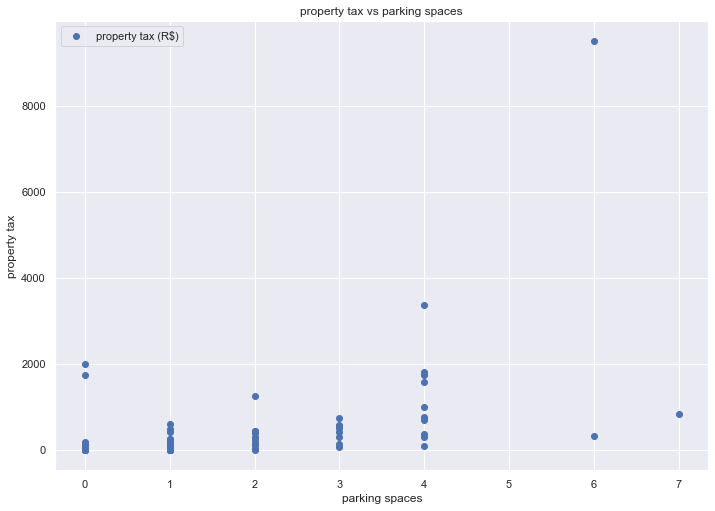

Pearsons correlation: 0.098


In [22]:
sample.plot(x='parking spaces', y="property tax (R$)", style='o')  
plt.title('property tax vs parking spaces')  
plt.xlabel('parking spaces')  
plt.ylabel('property tax')  
plt.show()

data1=house_data['property tax (R$)'].values
data2=house_data['parking spaces'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

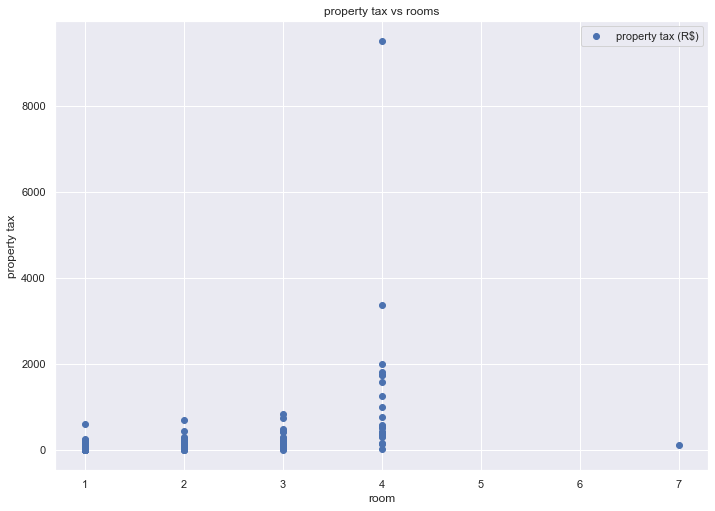

Pearsons correlation: 0.075


In [23]:
sample.plot(x='rooms', y="property tax (R$)", style='o')  
plt.title('property tax vs rooms')  
plt.xlabel('room')  
plt.ylabel('property tax')  
plt.show()

data1=house_data['property tax (R$)'].values
data2=house_data['rooms'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

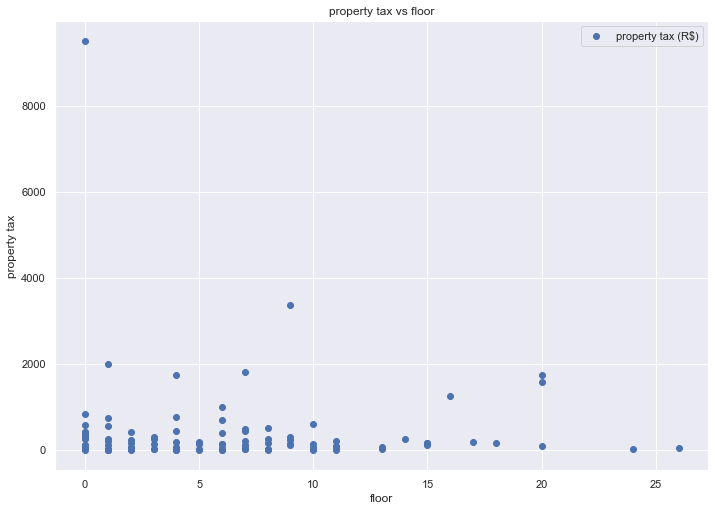

Pearsons correlation: 0.013


In [24]:
sample.plot(x='floor', y="property tax (R$)", style='o')  
plt.title('property tax vs floor')  
plt.xlabel('floor')  
plt.ylabel('property tax')  
plt.show()

data1=house_data['property tax (R$)'].values
data2=house_data['floor'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

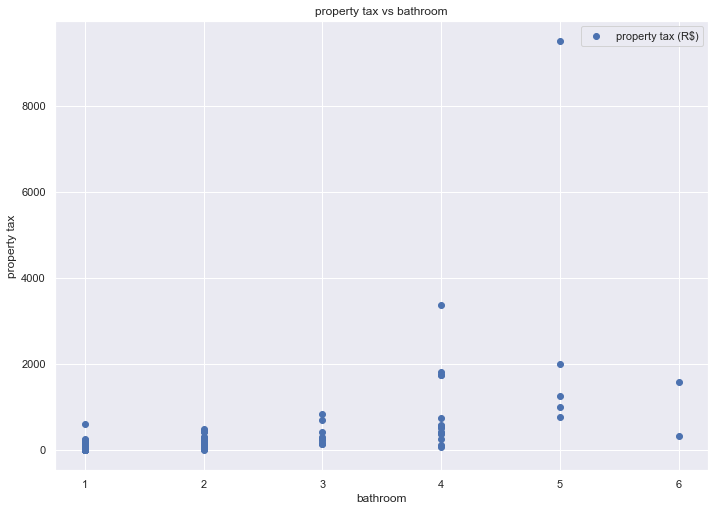

Pearsons correlation: 0.109


In [25]:
sample.plot(x='bathroom', y="property tax (R$)", style='o')  
plt.title('property tax vs bathroom')  
plt.xlabel('bathroom')  
plt.ylabel('property tax')  
plt.show()

data1=house_data['property tax (R$)'].values
data2=house_data['bathroom'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Finding corelation between fire insurance and other values

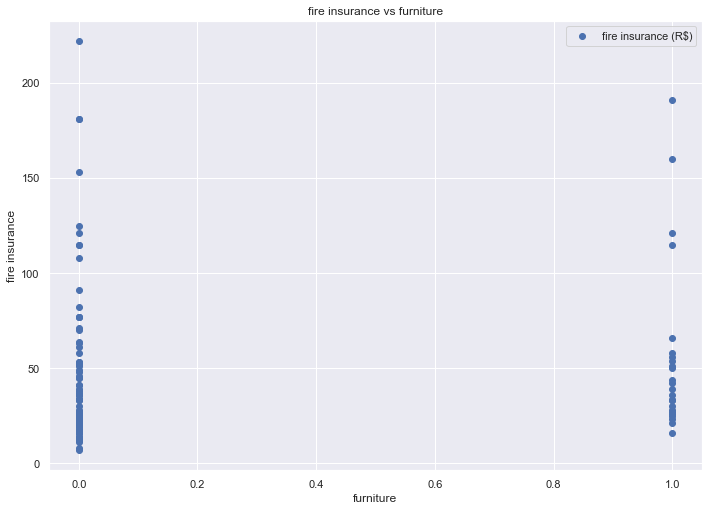

Pearsons correlation: 0.142


In [26]:
sample.plot(x='furniture', y="fire insurance (R$)", style='o')  
plt.title('fire insurance vs furniture')  
plt.xlabel('furniture')  
plt.ylabel('fire insurance')  
plt.show()

data1=house_data['fire insurance (R$)'].values
data2=house_data['furniture'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

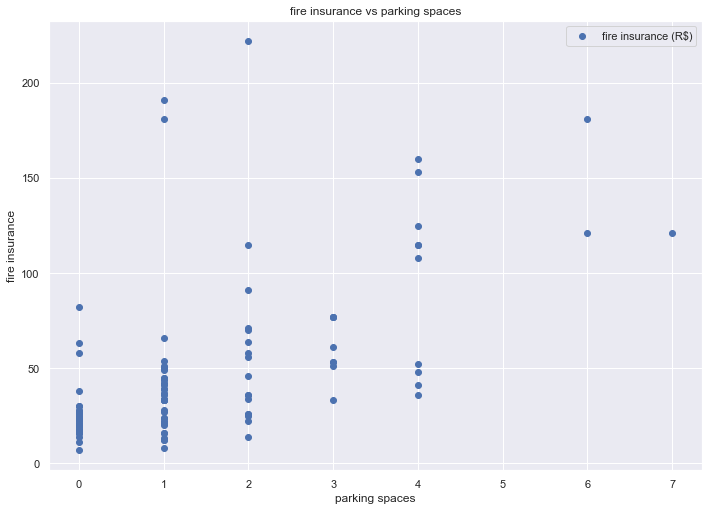

Pearsons correlation: 0.597


In [27]:
sample.plot(x='parking spaces', y="fire insurance (R$)", style='o')  
plt.title('fire insurance vs parking spaces')  
plt.xlabel('parking spaces')  
plt.ylabel('fire insurance')  
plt.show()

data1=house_data['fire insurance (R$)'].values
data2=house_data['parking spaces'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

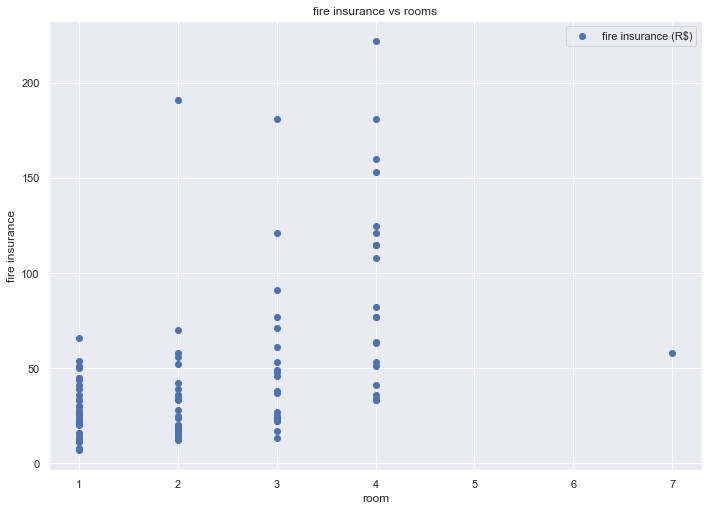

Pearsons correlation: 0.565


In [28]:
sample.plot(x='rooms', y="fire insurance (R$)", style='o')  
plt.title('fire insurance vs rooms')  
plt.xlabel('room')  
plt.ylabel('fire insurance')  
plt.show()

data1=house_data['fire insurance (R$)'].values
data2=house_data['rooms'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

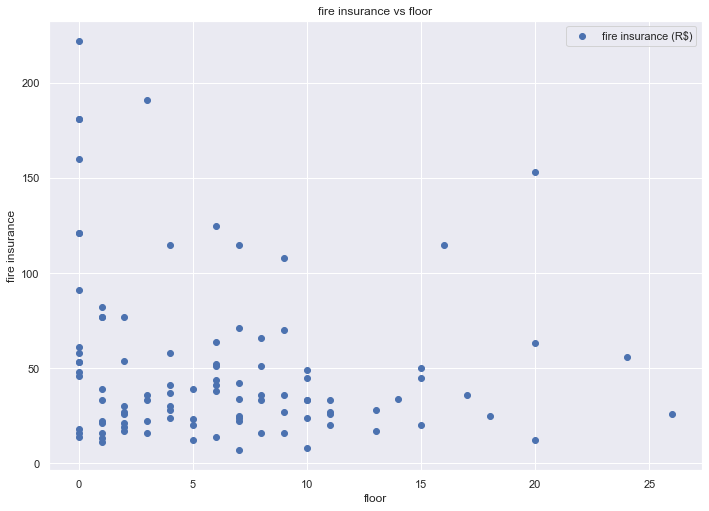

Pearsons correlation: 0.014


In [29]:
sample.plot(x='floor', y="fire insurance (R$)", style='o')  
plt.title('fire insurance vs floor')  
plt.xlabel('floor')  
plt.ylabel('fire insurance')  
plt.show()

data1=house_data['fire insurance (R$)'].values
data2=house_data['floor'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

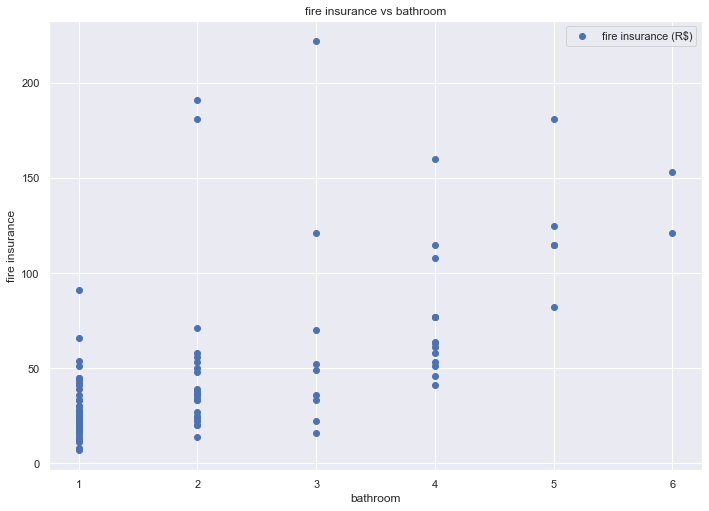

Pearsons correlation: 0.676


In [30]:
sample.plot(x='bathroom', y="fire insurance (R$)", style='o')  
plt.title('fire insurance vs bathroom')  
plt.xlabel('bathroom')  
plt.ylabel('fire insurance')  
plt.show()

data1=house_data['fire insurance (R$)'].values
data2=house_data['bathroom'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

# Part 3

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

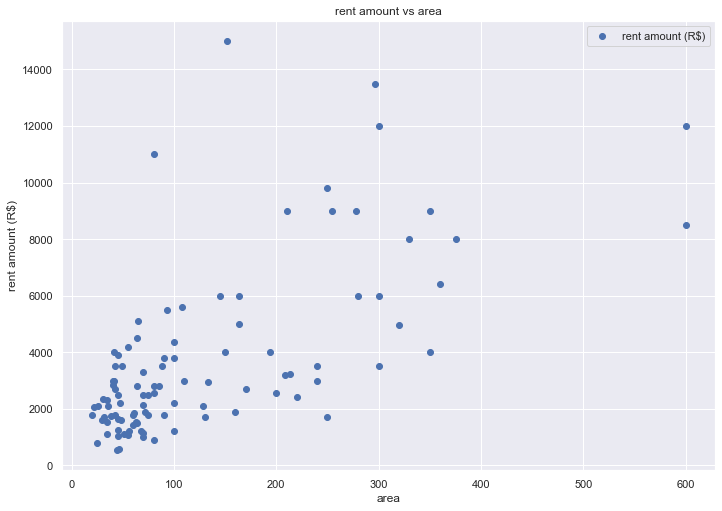

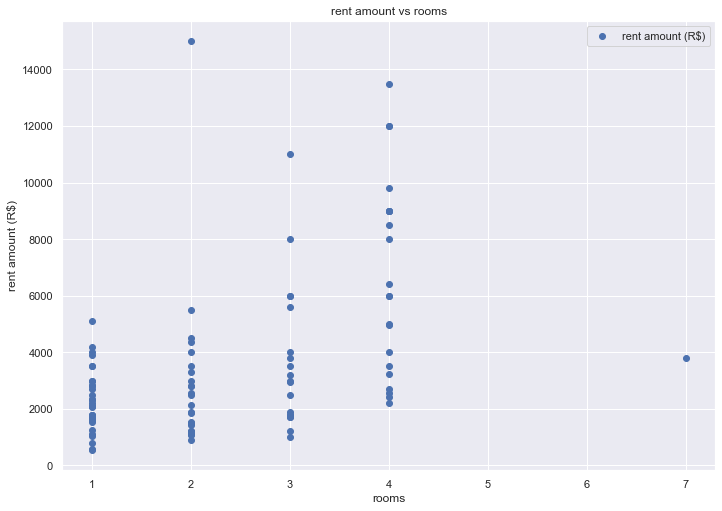

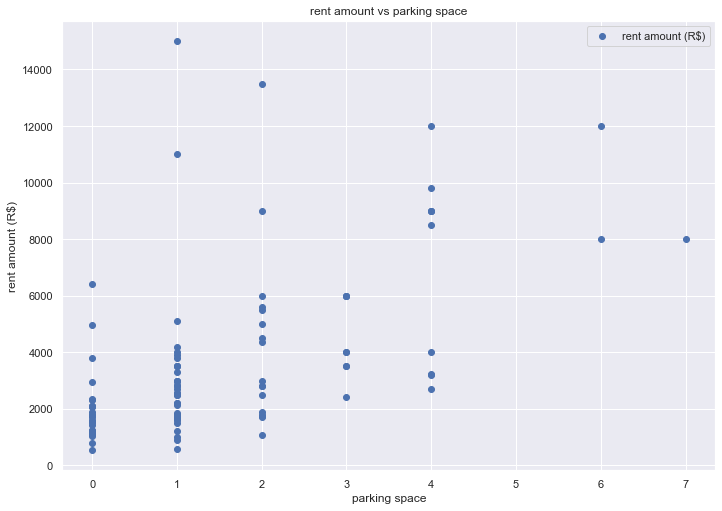

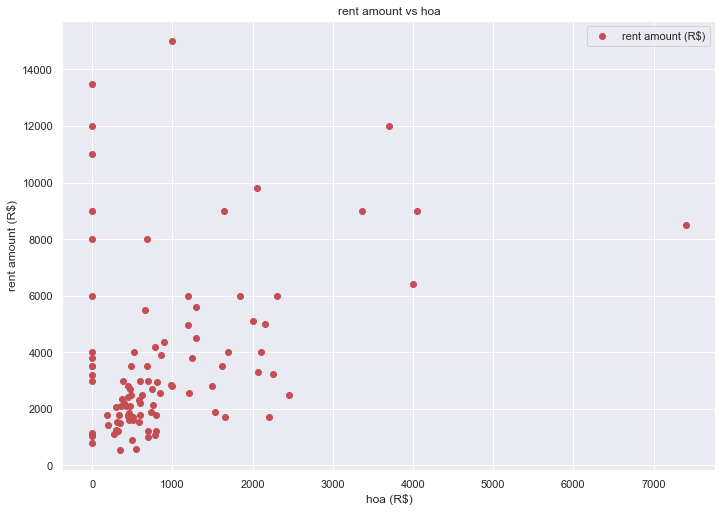

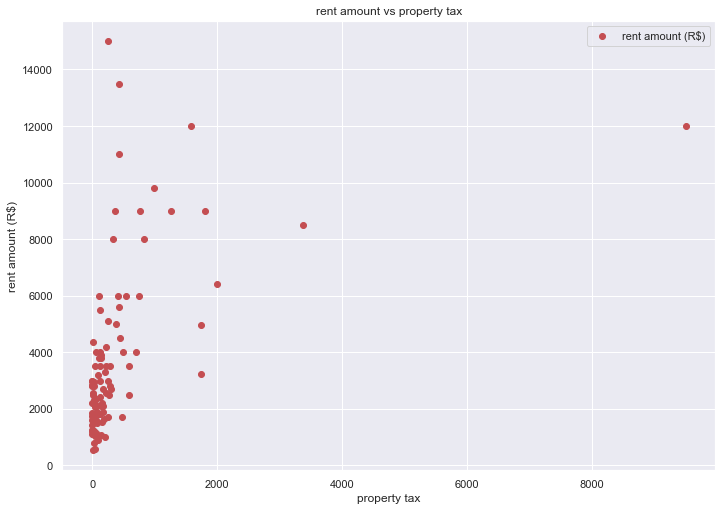

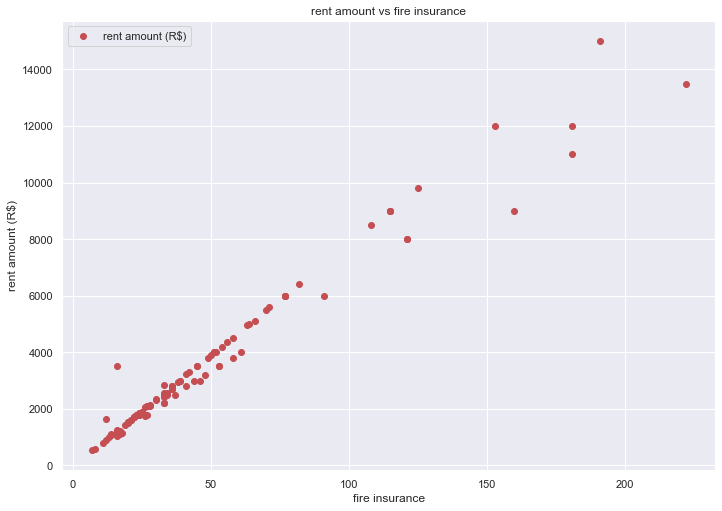

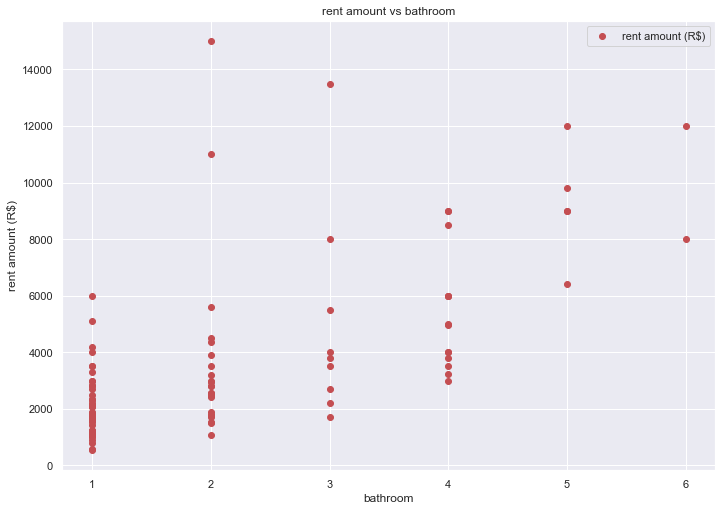

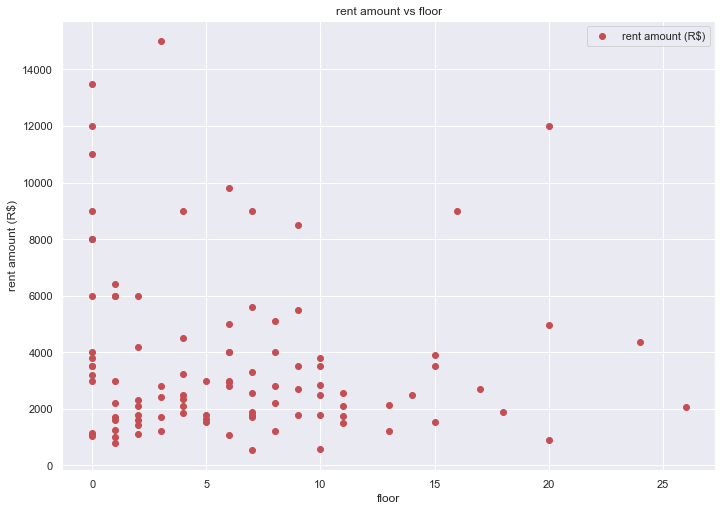

In [32]:
sample.plot(x='area', y='rent amount (R$)', style='o')  
plt.title('rent amount vs area')  
plt.xlabel('area')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='rooms', y='rent amount (R$)', style='o')  
plt.title('rent amount vs rooms')  
plt.xlabel('rooms')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='parking spaces', y='rent amount (R$)', style='o')  
plt.title('rent amount vs parking space')  
plt.xlabel('parking space')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='hoa (R$)', y='rent amount (R$)', style='ro')  
plt.title('rent amount vs hoa')  
plt.xlabel('hoa (R$)')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='property tax (R$)', y='rent amount (R$)', style='ro')  
plt.title('rent amount vs property tax')  
plt.xlabel('property tax')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='fire insurance (R$)', y='rent amount (R$)', style='ro')  
plt.title('rent amount vs fire insurance')  
plt.xlabel('fire insurance')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='bathroom', y='rent amount (R$)', style='ro')  
plt.title('rent amount vs bathroom')  
plt.xlabel('bathroom')  
plt.ylabel('rent amount (R$)')  
plt.show()

sample.plot(x='floor', y='rent amount (R$)', style='ro')  
plt.title('rent amount vs floor')  
plt.xlabel('floor')  
plt.ylabel('rent amount (R$)')  
plt.show()

As we need to find dependence of Other attribute on rent . So we divide the data into Rent as the lable and others as the attributes.

In [33]:
X= house_data[['area','rooms','bathroom','parking spaces','floor','animal','furniture','hoa (R$)','property tax (R$)','fire insurance (R$)']].values
y=house_data['rent amount (R$)'].values

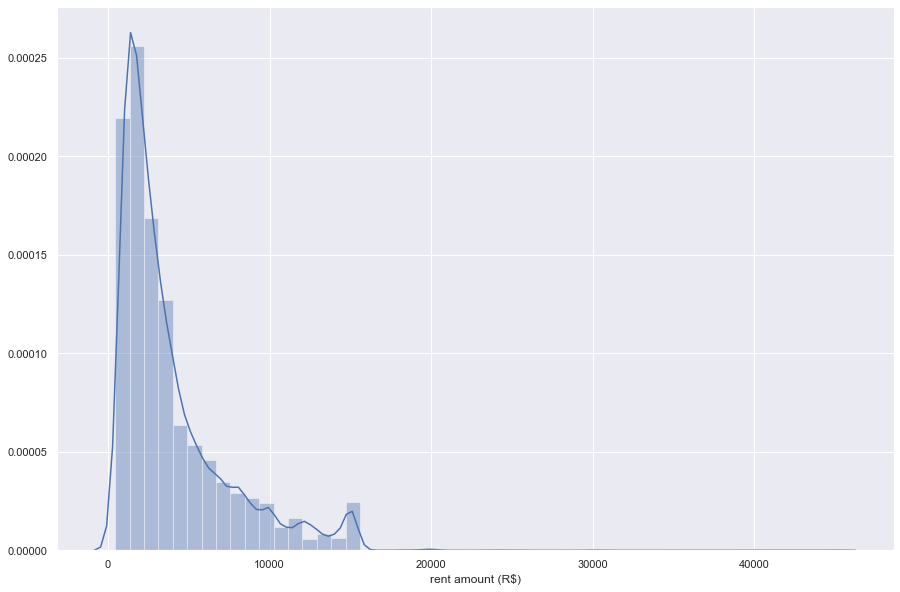

In [34]:
#Average value of rent column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(house_data['rent amount (R$)'])

Now we will train our model ,with 95% of data to be training set and 5% data as testing set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# predicting from the data
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1=df.head(20)

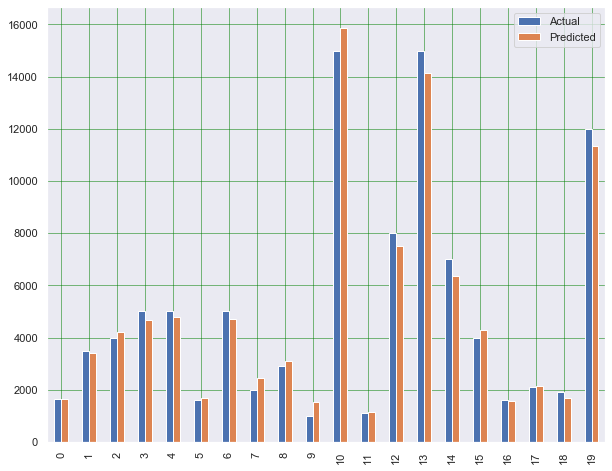

In [38]:
#plotting actual value vs predicted value
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

To check the performance of the algorithm

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 317.69742450691547
Mean Squared Error: 276939.7805485721
Root Mean Squared Error: 526.2506822309801
